In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statistics
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics

# **Funções**

In [ ]:
# Valor crítico, para ser usado na remoção dos outliers
def calculate_critical_value(size, alpha):
    # https://github.com/bhattbhavesh91/outlier-detection-grubbs-test-and-generalized-esd-test-python/blob/master/grubbs-test-for-outliers.ipynb
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    return critical_value

# remove outliers das colunas escolhidas
def remove_outliers_from_dataset(dataframe,columns,alpha):
  df = dataframe
  for column_name in columns:
      while 1:
          column = df[column_name]
          s = sum(column)
          average_y = s/len(column)
          max_y_less_average_y=0
          row=0
          for i in range(0,len(column)):
              if(i in df.index and abs(column[i]-average_y)>max_y_less_average_y):
                  max_y_less_average_y=abs(column[i]-average_y)
                  row=i
          G = max_y_less_average_y/statistics.stdev(column)
          critical_value = calculate_critical_value(len(column),alpha)
          if G > critical_value:
              # G > valor crítico: Outliner na linha
              df = df.drop(row)
          else:
              # G < valor crítico: Hipotese nula, não existem mais outliners
              break
  return df

def normalization(dataframe):
    return pd.DataFrame(preprocessing.normalize(dataframe, axis=0),columns=dataframe.columns)

def standardization(dataframe):
    return pd.DataFrame(preprocessing.StandardScaler().fit_transform(dataframe),index=dataframe.index,columns=dataframe.columns)

def output(DS_train,DS_test,DS_y_train,DS_y_test,title):
    lreg = LogisticRegression().fit(DS_train,DS_y_train)
    DS_probability = lreg.predict(DS_test)

    # output
    confusion_matrix = metrics.confusion_matrix(DS_y_test,DS_probability)
    ax = sns.heatmap(confusion_matrix,annot=True)
    ax.set_title(title)
    ax.set_ylabel('Resultado real')
    ax.set_xlabel('Resultado previsto')
    plt.show()

# **Main**
1. ler o arquivo csv
2. Separar em DS1, DS2, DS3
3. Separar em matriz de teste e treinamento
4. aplicar a regressão logistica
5. aplicar matriz de confusão


In [ ]:
# evita limite no terminal
pd.set_option('display.max_rows', None)

# lê dataframe, ignora index
DS0 = pd.read_csv('sample_data/data-t1.csv', index_col=False)
DS0 = DS0.drop('id',axis=1) # remove coluna id
DS0['diagnosis'] = DS0['diagnosis'].replace('M',1).replace('B',0) # substitui coluna de diagnose com 0s e 1s

# para remover outliners
_columns = DS0.columns
_columns = _columns.drop('diagnosis')

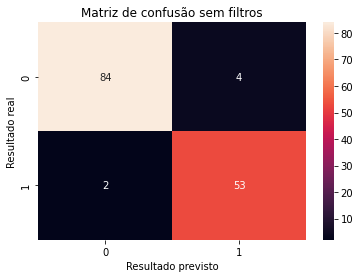

In [ ]:
# regressão logistica de DS0, sem nenhuma mudança nos dados
DS_train, DS_test, DS_y_train, DS_y_test = train_test_split(DS0.drop('diagnosis',axis=1),DS0['diagnosis'],test_size=0.25, random_state=101)
lreg = LogisticRegression(max_iter=10000).fit(DS_train,DS_y_train)
DS_probability = lreg.predict(DS_test)

# output
confusion_matrix = metrics.confusion_matrix(DS_y_test,DS_probability)
ax = sns.heatmap(confusion_matrix,annot=True)
ax.set_title("Matriz de confusão sem filtros")
ax.set_ylabel('Resultado real')
ax.set_xlabel('Resultado previsto')
plt.show()

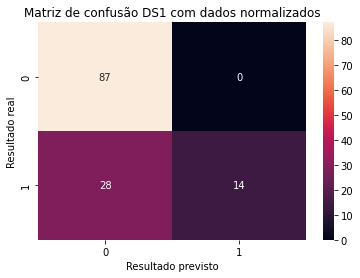

In [ ]:
# DS1n normaliza e depois remove outliners
DS1n = normalization(DS0.drop('diagnosis',axis=1))
DS1n = DS1n.join(DS0['diagnosis'])
DS1n = remove_outliers_from_dataset(DS1n,_columns,0.05)

DS_train, DS_test, DS_y_train, DS_y_test = train_test_split(DS1n.drop('diagnosis',axis=1),DS1n['diagnosis'],test_size=0.25, random_state=101)
output(DS_train,DS_test,DS_y_train,DS_y_test,"Matriz de confusão DS1 com dados normalizados")

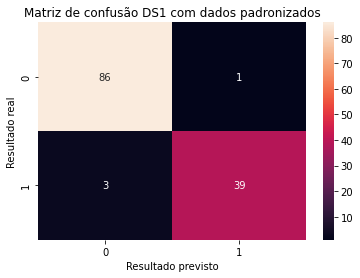

In [ ]:
# DS1s padroniza e depois remove outliners
DS1s = standardization(DS0.drop('diagnosis',axis=1))
DS1s = DS1s.join(DS0['diagnosis'])
DS1s = remove_outliers_from_dataset(DS1s,_columns,0.05)

DS_train, DS_test, DS_y_train, DS_y_test = train_test_split(DS1s.drop('diagnosis',axis=1),DS1s['diagnosis'],test_size=0.25, random_state=101)
output(DS_train,DS_test,DS_y_train,DS_y_test,"Matriz de confusão DS1 com dados padronizados")

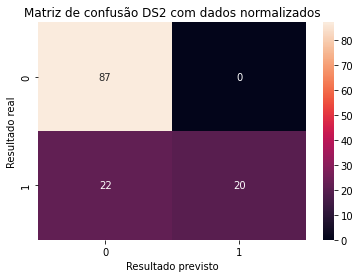

In [ ]:
# DS2n: remove outliners e depois normaliza
DS2n = remove_outliers_from_dataset(DS0,_columns,0.05)
Y = DS2n['diagnosis']
DS2n = normalization(DS2n.drop('diagnosis',axis=1))

DS_train, DS_test, DS_y_train, DS_y_test = train_test_split(DS2n,Y,test_size=0.25, random_state=101)
output(DS_train, DS_test, DS_y_train, DS_y_test,"Matriz de confusão DS2 com dados normalizados")

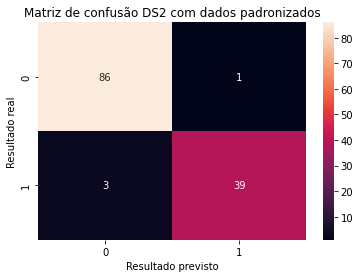

In [ ]:
# DS2s: remove outliners e depois padroniza
DS2s = remove_outliers_from_dataset(DS0,_columns,0.05)
Y = DS2s['diagnosis']
DS2s = standardization(DS2s.drop('diagnosis',axis=1))

DS_train, DS_test, DS_y_train, DS_y_test = train_test_split(DS2s,Y,test_size=0.25, random_state=101)
output(DS_train, DS_test, DS_y_train, DS_y_test,"Matriz de confusão DS2 com dados padronizados")

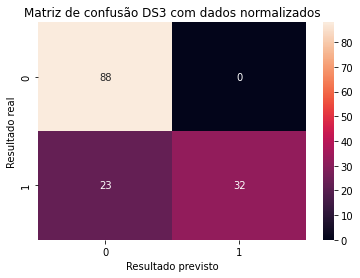

In [ ]:
# DS3s: apenas normaliza
Y = DS0['diagnosis']
DS3s = normalization(DS0.drop('diagnosis',axis=1))

DS_train, DS_test, DS_y_train, DS_y_test = train_test_split(DS3s,Y,test_size=0.25, random_state=101)
output(DS_train, DS_test, DS_y_train, DS_y_test,"Matriz de confusão DS3 com dados normalizados")

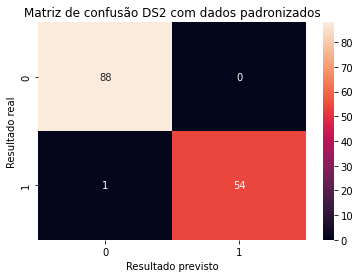

In [ ]:
# DS3s: apenas padroniza
Y = DS0['diagnosis']
DS3s = standardization(DS0.drop('diagnosis',axis=1))

DS_train, DS_test, DS_y_train, DS_y_test = train_test_split(DS3s,Y,test_size=0.25, random_state=101)
output(DS_train, DS_test, DS_y_train, DS_y_test,"Matriz de confusão DS3 com dados padronizados")